# Metodos numéricos II

## Métodos de la serie de Taylor
A lo largo de esta sección analizaremos como resolver Ecuaciones Diferenciales numericamente.

In [4]:
using DataFrames #Utilizaremos los Dataframes para realizar tablas con el fin de comparar resultados
using Plots

### Método de Euler

In [5]:
function euler_method(f, y0, t0, tn, h)
    num_steps = Int((tn - t0) / h)
    t_values = zeros(num_steps + 1)
    y_values = zeros(num_steps + 1)
    t_values[1] = t0
    y_values[1] = y0
    for i in 1:num_steps
        t_values[i + 1] = t_values[i] + h
        y_values[i + 1] = y_values[i] + h * f(t_values[i], y_values[i])
    end
    return t_values, y_values
end

euler_method (generic function with 1 method)

In [6]:
f(t, y) = y - t^2 + 1
y0 = 0.5
t0 = 0.0
tn = 2.0
h = 0.2
t_values, y_values = euler_method(f, y0, t0, tn, h)

([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998], [0.5, 0.8, 1.1520000000000001, 1.5504000000000002, 1.9884800000000002, 2.4581760000000004, 2.9498112000000005, 3.4517734400000006, 3.950128128000001, 4.428153753600001, 4.865784504320001])

In [7]:
g(t) = -exp(t) /2 + t^2 +2*t + 1

g (generic function with 1 method)

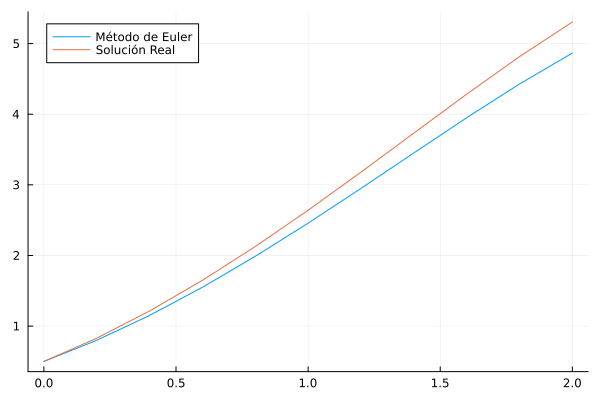

In [8]:
plot(t_values,y_values, label= "Método de Euler")
plot!(t_values,g.(t_values), label = "Solución Real")

### Método de serie de Taylor de orden 2

In [9]:
using Symbolics
@variables x y t;

In [10]:
using Zygote
function taylor2(f, y0, tspan, h)
    t0, T = tspan
    N = Int((T - t0) / h)
    t_values = zeros(N+1)
    y_values = zeros(N+1)
    t_values[1] = t0
    y_values[1] = y0
    df(t_val,y_val) =  Symbolics.substitute.((Symbolics.derivative(f(t,y), t)  + Symbolics.derivative(f(t,y), y) * f(t,y)), (Dict(t => t_val, y => y_val),))[1]
    for i in 1:N
        t = t_values[i]
        y = y_values[i]
        f1 = f(t,y)
        f2 = Symbolics.value.(df(t, y))
        y_new = y + h * f1 + 0.5 * h^2 * f2
        t_values[i+1] = t + h
        y_values[i+1] = y_new
    end
    return t_values, y_values
end

taylor2 (generic function with 1 method)

In [11]:
f(t, y) = y - t^2 + 1
y0 = 0.5
t0 = 0.0
tn = 2.0
h = 0.2
tspan = (0.0, 2.0)
t_values, y_values = taylor2(f, y0, tspan, h)

([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998], [0.5, 0.8300000000000001, 1.2158000000000002, 1.652076, 2.1323327200000004, 2.6486459184000006, 3.1913480204480007, 3.748644584946561, 4.306146393634804, 4.846298600234461, 5.347684292286043])

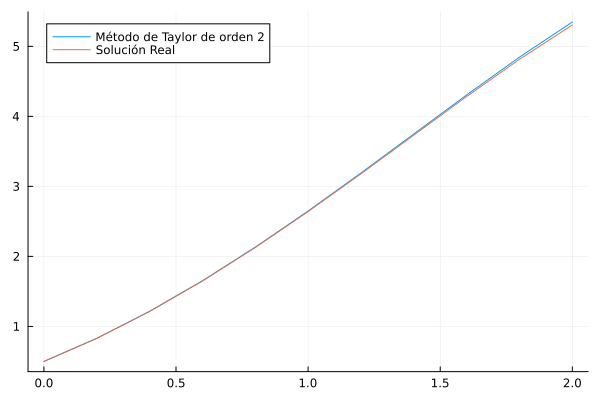

In [12]:
plot(t_values,y_values, label= "Método de Taylor de orden 2")
plot!(t_values,g.(t_values), label = "Solución Real")

### Método de serie de Taylor de orden 4

In [13]:
function taylor4(f, y0, tspan, h)
    df1=(Symbolics.derivative(f(t,y), t)  + Symbolics.derivative(f(t,y), y) * f(t,y))
    df2 = (Symbolics.derivative(df1, t)  + Symbolics.derivative(df1, y) * f(t,y))
    df3=(Symbolics.derivative(df2, t)  + Symbolics.derivative(df2, y) * f(t,y))
    dfun1(t_val,y_val) =  Symbolics.value.(Symbolics.substitute.(df1, (Dict(t => t_val, y => y_val),))[1])
    dfun2(t_val,y_val) =  Symbolics.value.(Symbolics.substitute.(df2 , (Dict(t => t_val, y => y_val),))[1])
    dfun3(t_val,y_val) =  Symbolics.value.(Symbolics.substitute.(df3, (Dict(t => t_val, y => y_val),))[1])
    t0, T = tspan
    num_steps = Int((T - t0) / h)
    t_values = zeros(num_steps + 1)
    y_values = zeros(num_steps + 1)
    t_values[1] = t0
    y_values[1] = y0
    for i in 1:num_steps
        t = t_values[i]
        y = y_values[i]
        f_val = f(t, y)
        df_val = dfun1(t, y)
        d2f_val = dfun2(t, y)
        d3f_val = dfun3(t, y)
        y_new = y + h*f_val + (h^2)/2 * df_val + (h^3)/6 * d2f_val + (h^4)/24 * d3f_val
        t_new = t + h
        t_values[i + 1] = t_new
        y_values[i + 1] = y_new
    end
    return t_values, y_values
end

taylor4 (generic function with 1 method)

In [14]:
f(t, y) = y - t^2 + 1
y0 = 0.5
t0 = 0.0
tn = 2.0
h = 0.2
tspan = (0.0, 2.0)
t_values, y_values = taylor4(f, y0, tspan, h)

([0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998], [0.5, 0.8293, 1.2140910200000001, 1.6489467718280002, 2.1272395871107195, 2.640874431697033, 3.179964030874756, 3.732432067310427, 4.2835285270129555, 4.815237742893624, 5.305555379170272])

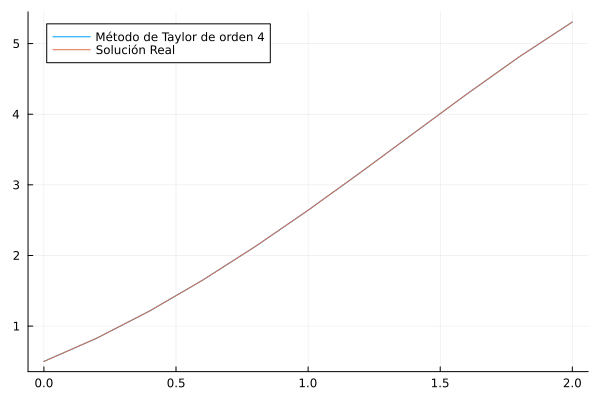

In [15]:
plot(t_values,y_values, label= "Método de Taylor de orden 4")
plot!(t_values,g.(t_values), label = "Solución Real")

## Métodos Runge-Kutta

### Método del punto medio

In [21]:
function midpoint_rk4(f, tspan, y0, h)
    t0, tf = tspan
    t = t0:h:tf
    n = length(t)
    y = zeros(n)
    y[1] = y0

    for i in 1:n-1
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + h*f(t[i]+h/2,y[i] + h/2 * f(t[i],y[i]))
    end

    return t, y
end


midpoint_rk4 (generic function with 1 method)

In [22]:
midpoint_rk4(f,tspan,0.5,0.2)

(0.0:0.2:2.0, [0.5, 0.8280000000000001, 1.21136, 1.6446592, 2.121284224, 2.6331667532800003, 3.1704634390016, 3.721165395581952, 4.2706217826099815, 4.800958574784177, 5.290369461236696])

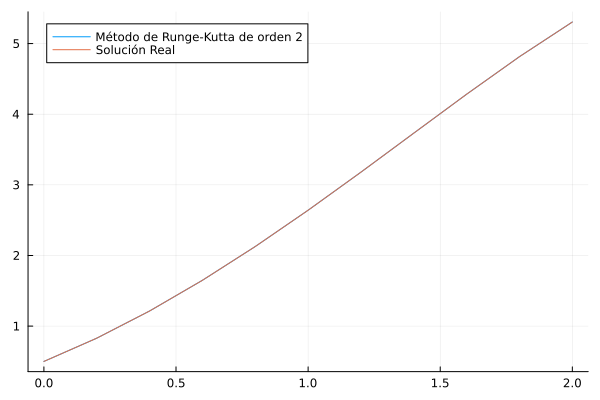

In [23]:
plot(t_values,y_values, label= "Método de Runge-Kutta de orden 2")
plot!(t_values,g.(t_values), label = "Solución Real")